In [ ]:
#Acquisition of files

from google.colab import files
x = files.upload()

! ls -hl
! unzip 'splithiragana.zip'

In [ ]:
#Print info about sample image

import PIL
print('Pillow Version:', PIL.__version__)
# load and show an image with Pillow
from PIL import Image
# load the image
image = Image.open('splithiragana/training/ha/0.png')
# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)

Pillow Version: 7.1.2
PNG
RGB
(640, 640)


In [ ]:
#Create generators

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    #horizontal_flip=True,
    rescale=1./255,
    fill_mode='nearest')
# Generator for training dataset
train_generator = my_generator.flow_from_directory( 
    'splithiragana/training/', target_size=(150, 150),
     batch_size=4, class_mode='categorical')
valid_generator = my_generator.flow_from_directory( 
    'splithiragana/validation/', target_size=(150, 150),
     batch_size=4, class_mode='categorical')

Found 867 images belonging to 46 classes.
Found 92 images belonging to 46 classes.


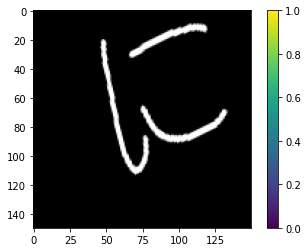

(150, 150, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#Display an example image from the generator

import matplotlib.pyplot as plt
for my_batch in train_generator:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    for i in range(len(labels)):
        # Gives one image and its corresponding label
        plt.imshow(images[i])
        plt.colorbar()
        plt.show()
        print(images[i].shape)
        print(labels[i])
        break
    break

In [ ]:
#Build model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, BatchNormalization, Dropout

model = Sequential()
model.add( Conv2D( 96, ( 3, 3 ), activation = 'relu', input_shape = (150, 150, 3) ) )
model.add( Dropout(.05, input_shape=(150, 150, 3) ) )
model.add( Conv2D( 48, ( 3, 3 ), activation = 'relu', input_shape = (150, 150, 3) ) )
model.add( Dropout(.05, input_shape=(150, 150, 3) ) )
model.add( Conv2D( 48, ( 3, 3 ), activation = 'relu', input_shape = (150, 150, 3) ) )
model.add( Dropout(.05, input_shape=(150, 150, 3) ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 24, ( 3, 3 ), activation = 'relu' ) )
model.add(Dropout(.05, input_shape=(150, 150, 3) ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 24, ( 3, 3 ), activation = 'relu' ) )
model.add( Flatten() )
model.add( Dense( 20, activation = 'relu' ) )
model.add( Dense( 46, activation = 'softmax' ) )
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 148, 148, 96)      2688      
                                                                 
 conv2d_26 (Conv2D)          (None, 146, 146, 48)      41520     
                                                                 
 conv2d_27 (Conv2D)          (None, 144, 144, 48)      20784     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 48)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 34, 34, 24)        10392     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 24)         0         
 g2D)                                                 

In [ ]:
#Run model

model.compile( optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = [ 'accuracy' ] )
# Train using the training set and evaluate using the validation set
history = model.fit( train_generator, 
                    validation_data = valid_generator, 
                    epochs = 200, batch_size = 64 )

Epoch 1/200
217/217 [==============================] - 15s 64ms/step - loss: 3.8342 - accuracy: 0.0081 - val_loss: 3.8286 - val_accuracy: 0.0217
Epoch 2/200
217/217 [==============================] - 14s 62ms/step - loss: 3.8293 - accuracy: 0.0138 - val_loss: 3.8266 - val_accuracy: 0.0326
Epoch 3/200
217/217 [==============================] - 13s 61ms/step - loss: 3.8171 - accuracy: 0.0196 - val_loss: 3.7748 - val_accuracy: 0.0761
Epoch 4/200
217/217 [==============================] - 13s 61ms/step - loss: 3.7892 - accuracy: 0.0381 - val_loss: 3.7520 - val_accuracy: 0.0435
Epoch 5/200
217/217 [==============================] - 13s 61ms/step - loss: 3.7235 - accuracy: 0.0565 - val_loss: 3.6627 - val_accuracy: 0.0761
Epoch 6/200
217/217 [==============================] - 13s 61ms/step - loss: 3.6291 - accuracy: 0.0623 - val_loss: 3.5606 - val_accuracy: 0.0978
Epoch 7/200
217/217 [==============================] - 13s 61ms/step - loss: 3.4907 - accuracy: 0.0796 - val_loss: 3.5042 - val_ac

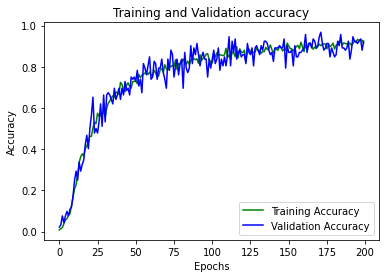

In [ ]:
#Create chart for accuracy
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(200)
plt.plot(epochs, accuracy, 'g', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Predict labels

test_generator = my_generator.flow_from_directory( 
    'splithiragana/testing/', 
    target_size=(150, 150), 
    batch_size=4, 
    class_mode='categorical')

Y = [] # empty list of true labels
P = [] # empty list of predictions
for i in range(263):
   x, y = test_generator.next()
   p = model.predict(x)
   Y.extend(y)
   P.extend(p)

#Print scores for predicted labels

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
accuracy = accuracy_score(Y, np.asarray(P).round())
precision = precision_score(Y, np.asarray(P).round(), average='macro')
recall = recall_score(Y, np.asarray(P).round(), average='macro')
f1 = f1_score(Y, np.asarray(P).round(), average='macro')

print('accuracy='+str(accuracy))
print('precision='+str(precision))
print('recall='+str(recall))
print('f1='+str(f1))

Found 92 images belonging to 46 classes.
accuracy=0.8498098859315589
precision=0.9014083263876816
recall=0.8505040957781977
f1=0.8659371495453824
